In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from ow_config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
# Output File (CSV)
output_data_file = "C:/Users/Hank/RICH201901DATA3/06-Python-APIs/Homework/output_data/cities.csv"


In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

In [6]:
# base url & units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL and request your results in Celsius
query_url = f"{url}appid={api_key}&units={units}&q="


In [9]:
# set up lists to hold response info
name = []
clouds = []
country = []
date = []
hum = []
lat = []
lng = []
max_temp = []
wind = []

# loop through the list of cities and perform a request for column data on each
# build in try: / except: to work around 'KeyError' for no data being available for a city
for city in cities:
    response = requests.get(query_url + city).json()
    print(city)
    try:
        name.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except KeyError:
        print ("An error occurred")
        

dudinka
amderma
An error occurred
thinadhoo
rikitea
port alfred
ribeira grande
ushuaia
punta arenas
bluff
ahipara
albany
plouzane
mataura
alcantara
beloha
port blair
tumannyy
An error occurred
jardim
provideniya
araouane
guadalupe
san quintin
grand gaube
luderitz
chokurdakh
warmbad
ranong
busselton
vaini
barrow
belushya guba
An error occurred
avarua
adre
sentyabrskiy
An error occurred
saint george
illoqqortoormiut
An error occurred
san andres
ye
An error occurred
muroto
palmer
coquimbo
hithadhoo
rehnan
bonavista
cabo san lucas
hobart
new norfolk
isangel
guerrero negro
hilo
cape town
talnakh
ballina
longyearbyen
bethel
puerto ayora
tabou
east stroudsburg
ilulissat
vicuna
An error occurred
victoria
pisco
fort nelson
sibu
jamestown
bandarbeyla
rawson
taolanaro
An error occurred
hokitika
bathsheba
halalo
An error occurred
kapaa
tessalit
saint-philippe
atikokan
nanortalik
norman wells
puerto baquerizo moreno
kodiak
yulara
kaeo
georgetown
balangir
burica
An error occurred
yaan
ponta do sol
l

In [11]:
# create a data frame from the populated lists
weather_dict = {"City":name, "Cloudiness":clouds, "Country":country, "Date":date, "Humidity":hum, "Lat":lat,
               "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dudinka,36,RU,1551654069,55,69.41,86.18,-5.55,10.45
1,Thinadhoo,68,MV,1551654072,100,0.53,72.93,83.38,12.91
2,Rikitea,68,PF,1551654072,100,-23.12,-134.97,79.51,12.24
3,Port Alfred,0,ZA,1551653965,91,-33.59,26.89,66.99,8.77
4,Ribeira Grande,40,PT,1551652200,76,38.52,-28.70,55.40,4.70


## Latitude vs. Temperature Plot

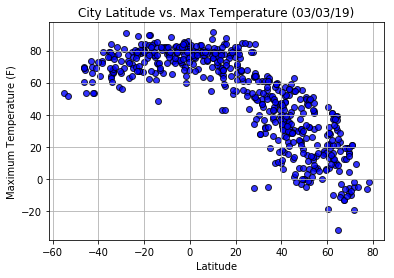

In [12]:
# Latitude vs. Max Temperature plot
plt.scatter(lat, max_temp, color="blue", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature (03/03/19)")
plt.grid()
plt.show()


## Latitude vs. Humidity Plot

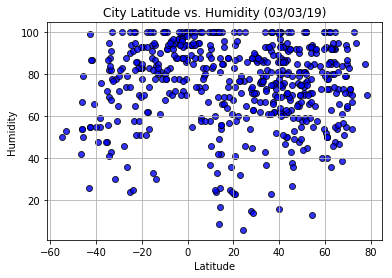

In [13]:
# Latitude vs. Humidity plot
plt.scatter(lat, hum, color="blue", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (03/03/19)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

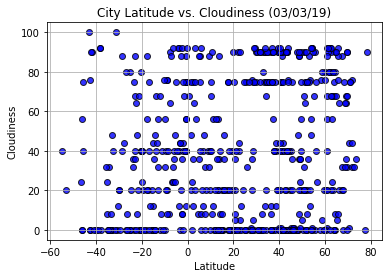

In [14]:
# Latitude vs. Cloudiness plot
plt.scatter(lat, clouds, color="blue", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (03/03/19)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

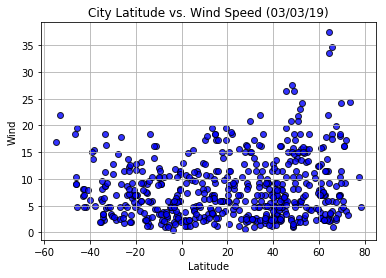

In [15]:
# Latitude vs. Wind Speed plot
plt.scatter(lat, wind, color="blue", alpha=0.8, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.title("City Latitude vs. Wind Speed (03/03/19)")
plt.grid()
plt.show()